0. Loading the dataset and Pre-processing


In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
#loading train and test datasets from Kaggle

#also load csv of preprocessed datasets (to reduce runtime by preprocessing once and storing the preprocessed dataset into csv)

! gdown --id 1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
! gdown --id 1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
! gdown --id 1oiVQignVg1wvE1LXKFvOLHPl0P8GNSDp

! gdown --id 1pGkEyDelD7Lp7yhFML9Dt1oo-91Mqf9H
! gdown --id 1DYVzeYjjTTeHtazHfKD9FTx57h-77bkC

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
To: /content/train.csv
100% 98.6M/98.6M [00:00<00:00, 135MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
To: /content/test.csv
100% 25.1M/25.1M [00:00<00:00, 187MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://dr

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submit_data = pd.read_csv("submit.csv")

In [ ]:
test_data = test_data.join(submit_data["label"])

In [ ]:
# Checking null values
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Removing null values
train_data.dropna(inplace=True)
train_data.drop(train_data.loc[train_data['text']==" "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="  "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="\n"].index, inplace=True)

# Resetting index
train_data.reset_index(inplace=True)

In [ ]:
train_data= train_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
train_data = train_data.drop(columns=["id", "index"])

In [ ]:
# Checking null values
test_data.isnull().sum()

id          0
title     122
author    503
text        7
label       0
dtype: int64

In [ ]:
# Removing null values
test_data.dropna(inplace=True)
test_data.drop(test_data.loc[test_data['text']==" "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="  "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="\n"].index, inplace=True)

# Resetting index
test_data.reset_index(inplace=True)

In [ ]:
test_data= test_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
test_data = test_data.drop(columns=["id","index"])

In [ ]:
#removing stopwords for train data

In [ ]:
import nltk

import re
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_set = set(stopwords.words('english'))

sw_removed = []

for i in range(len(train_data)):
    review = re.sub('[^a-zA-Z0-9]',' ',train_data['text'][i])
    review = review.split()
    review = [word for word in review if not word in stop_words_set]
    statements = ' '.join(review)
    sw_removed.append(statements)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#stemming for training data

In [ ]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

stemmed = []

print(len(sw_removed))

for i in range(len(sw_removed)):
  sw_removed_1 = sw_removed[i].split()
  stem = [ps.stem(word) for word in sw_removed_1]
  st = ' '.join(stem)
  stemmed.append(st)


18211


In [ ]:
preprocess_arr = np.array(stemmed)

preprocess_df = pd.DataFrame(preprocess_arr)

In [ ]:
# do stopword removal and stemming for test data as well

In [ ]:
sw_removed = []

for i in range(len(test_data)):
    review = re.sub('[^a-zA-Z0-9]',' ',test_data['text'][i])
    review = review.split()
    review = [word for word in review if not word in stop_words_set]
    statements = ' '.join(review)
    sw_removed.append(statements)


In [ ]:
stemmed = []

print(len(sw_removed))

for i in range(len(sw_removed)):
  sw_removed_1 = sw_removed[i].split()
  stem = [ps.stem(word) for word in sw_removed_1]
  st = ' '.join(stem)
  stemmed.append(st)


4544


In [ ]:
preprocess_arr_test = np.array(stemmed)

preprocess_df_test = pd.DataFrame(preprocess_arr_test)

In [ ]:
# preprocess_df.head() 

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=3000)

# train_input = vectorizer.fit_transform(preprocess_arr).toarray()
# transformed_df = pd.DataFrame(data=train_input, columns=vectorizer.get_feature_names())

In [ ]:
# transformed_df.tail()

In [ ]:
# transformed_df.describe().max(axis=1)

In [ ]:
# len(train_data["label"].values)

In [ ]:
# import numpy as np
# import pandas as pd

In [ ]:
# transformed_df = pd.read_csv("train_processed.csv")

In [ ]:
transformed_df = pd.read_csv("pre_train.csv")
transformed_df_test = pd.read_csv("pre_test.csv")

In [ ]:
X_test = transformed_df_test.values
y_test = test_data["label"].values 

In [ ]:
X = transformed_df.values
y = train_data["label"].values

In [ ]:
#Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])


1. Exploratory Data Analysis

1.1 EDA: t-SNE scatterplot to check separability of data

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns #for scatterplot
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [ ]:
#first reduce features to 100 using PCA

pca = PCA(n_components=100, random_state=0)
pca_data = pca.fit_transform(X) #transformed data


In [ ]:
tsne = TSNE(n_components=2, perplexity=100, random_state=0)
tsne_data = tsne.fit_transform(pca_data) #transformed data

print(tsne_data[:10])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ -2.25471    -63.7256    ]
 [  2.3759966  -44.49983   ]
 [ 25.751188   -13.315375  ]
 [ 39.75759     -0.91169703]
 [ -1.0660607    5.129206  ]
 [ -9.084931   -15.490795  ]
 [-34.447136    18.244555  ]
 [-42.353916    -6.867411  ]
 [ 21.821554   -36.31945   ]
 [ 35.447628     3.625985  ]]


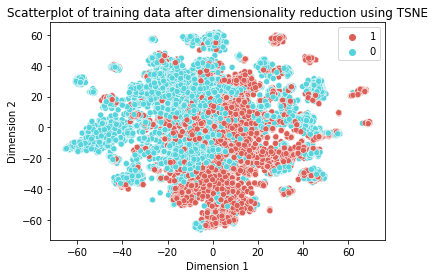

In [ ]:
#tsne scatterplot

ax = sns.scatterplot(x = tsne_data[:,0], y = tsne_data[:,1], hue = y, palette = sns.hls_palette(2), legend = 'full')
ax.set_title('Scatterplot of training data after dimensionality reduction using TSNE')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.savefig('1_2c_scatterplot.png')
plt.show()

1.2 EDA: number of features vs mean validation accuracy on baseline model (kFold k=5)

In [ ]:
x_axis = []
y_axis = []
y_axis_test=[]
x_axis_test=[]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer(ngram_range=(1,3), max_features=30)

train_input1 = vectorizer1.fit_transform(preprocess_arr).toarray()
transformed_df1 = pd.DataFrame(data=train_input1, columns=vectorizer1.get_feature_names())

In [ ]:
test_input1 = vectorizer1.fit_transform(preprocess_arr_test).toarray()
transformed_df_test1 = pd.DataFrame(data=test_input1, columns=vectorizer1.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold

X = transformed_df1.values
y = train_data["label"].values 

skf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb_0 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_1 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_2 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_3 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_4 = GaussianNB(var_smoothing = 4.64e-07)

In [ ]:
model_gnb_0.fit(X_train[0], y_train[0].astype('int'))
model_gnb_1.fit(X_train[1], y_train[1].astype('int'))
model_gnb_2.fit(X_train[2], y_train[2].astype('int'))
model_gnb_3.fit(X_train[3], y_train[3].astype('int'))
model_gnb_4.fit(X_train[4], y_train[4].astype('int'))

GaussianNB(var_smoothing=4.64e-07)

In [ ]:
y_pred_0 = model_gnb_0.predict(X_val[0])
y_pred_1 = model_gnb_1.predict(X_val[1])
y_pred_2 = model_gnb_2.predict(X_val[2])
y_pred_3 = model_gnb_3.predict(X_val[3])
y_pred_4 = model_gnb_4.predict(X_val[4])


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_val[0].astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_val[1].astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_val[2].astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_val[3].astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_val[4].astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis.append(30)
y_axis.append(accuracy)

print(accuracy)


0.7767830792822867


In [ ]:
X_test = transformed_df_test1.values
y_test = test_data["label"].values

In [ ]:
y_pred_0 = model_gnb_0.predict(X_test)
y_pred_1 = model_gnb_1.predict(X_test)
y_pred_2 = model_gnb_2.predict(X_test)
y_pred_3 = model_gnb_3.predict(X_test)
y_pred_4 = model_gnb_4.predict(X_test)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_test.astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_test.astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_test.astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_test.astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_test.astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis_test.append(30)
y_axis_test.append(accuracy)

print(accuracy)


0.582306338028169


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(ngram_range=(1,3), max_features=100)

train_input2 = vectorizer2.fit_transform(preprocess_arr).toarray()
transformed_df2 = pd.DataFrame(data=train_input2, columns=vectorizer2.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_input2 = vectorizer2.fit_transform(preprocess_arr_test).toarray()
transformed_df_test2 = pd.DataFrame(data=test_input2, columns=vectorizer2.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold

X = transformed_df2.values
y = train_data["label"].values 

skf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb_0 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_1 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_2 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_3 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_4 = GaussianNB(var_smoothing = 4.64e-07)

In [ ]:
model_gnb_0.fit(X_train[0], y_train[0].astype('int'))
model_gnb_1.fit(X_train[1], y_train[1].astype('int'))
model_gnb_2.fit(X_train[2], y_train[2].astype('int'))
model_gnb_3.fit(X_train[3], y_train[3].astype('int'))
model_gnb_4.fit(X_train[4], y_train[4].astype('int'))

GaussianNB(var_smoothing=4.64e-07)

In [ ]:
y_pred_0 = model_gnb_0.predict(X_val[0])
y_pred_1 = model_gnb_1.predict(X_val[1])
y_pred_2 = model_gnb_2.predict(X_val[2])
y_pred_3 = model_gnb_3.predict(X_val[3])
y_pred_4 = model_gnb_4.predict(X_val[4])


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_val[0].astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_val[1].astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_val[2].astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_val[3].astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_val[4].astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis.append(100)
y_axis.append(accuracy)
print(accuracy)

0.8033609927670031


In [ ]:
X_test = transformed_df_test2.values
y_test = test_data["label"].values

In [ ]:
y_pred_0 = model_gnb_0.predict(X_test)
y_pred_1 = model_gnb_1.predict(X_test)
y_pred_2 = model_gnb_2.predict(X_test)
y_pred_3 = model_gnb_3.predict(X_test)
y_pred_4 = model_gnb_4.predict(X_test)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_test.astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_test.astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_test.astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_test.astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_test.astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis_test.append(100)
y_axis_test.append(accuracy)

print(accuracy)


0.6314260563380282


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer3 = TfidfVectorizer(ngram_range=(1,3), max_features=500)

train_input3 = vectorizer3.fit_transform(preprocess_arr).toarray()
transformed_df3 = pd.DataFrame(data=train_input3, columns=vectorizer3.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_input3 = vectorizer3.fit_transform(preprocess_arr_test).toarray()
transformed_df_test3 = pd.DataFrame(data=test_input3, columns=vectorizer3.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold

X = transformed_df3.values
y = train_data["label"].values 

skf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb_0 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_1 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_2 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_3 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_4 = GaussianNB(var_smoothing = 4.64e-07)

In [ ]:
model_gnb_0.fit(X_train[0], y_train[0].astype('int'))
model_gnb_1.fit(X_train[1], y_train[1].astype('int'))
model_gnb_2.fit(X_train[2], y_train[2].astype('int'))
model_gnb_3.fit(X_train[3], y_train[3].astype('int'))
model_gnb_4.fit(X_train[4], y_train[4].astype('int'))

GaussianNB(var_smoothing=4.64e-07)

In [ ]:
y_pred_0 = model_gnb_0.predict(X_val[0])
y_pred_1 = model_gnb_1.predict(X_val[1])
y_pred_2 = model_gnb_2.predict(X_val[2])
y_pred_3 = model_gnb_3.predict(X_val[3])
y_pred_4 = model_gnb_4.predict(X_val[4])


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_val[0].astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_val[1].astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_val[2].astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_val[3].astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_val[4].astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis.append(500)
y_axis.append(accuracy)

print(accuracy)

0.8505847764129202


In [ ]:
X_test = transformed_df_test3.values
y_test = test_data["label"].values

In [ ]:
y_pred_0 = model_gnb_0.predict(X_test)
y_pred_1 = model_gnb_1.predict(X_test)
y_pred_2 = model_gnb_2.predict(X_test)
y_pred_3 = model_gnb_3.predict(X_test)
y_pred_4 = model_gnb_4.predict(X_test)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_test.astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_test.astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_test.astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_test.astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_test.astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis_test.append(500)
y_axis_test.append(accuracy)

print(accuracy)


0.5006161971830986


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer4 = TfidfVectorizer(ngram_range=(1,3), max_features=1000)

train_input4 = vectorizer4.fit_transform(preprocess_arr).toarray()
transformed_df4 = pd.DataFrame(data=train_input4, columns=vectorizer4.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_input4 = vectorizer4.fit_transform(preprocess_arr_test).toarray()
transformed_df_test4 = pd.DataFrame(data=test_input4, columns=vectorizer4.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold

X = transformed_df4.values
y = train_data["label"].values 

skf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb_0 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_1 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_2 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_3 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_4 = GaussianNB(var_smoothing = 4.64e-07)

In [ ]:
model_gnb_0.fit(X_train[0], y_train[0].astype('int'))
model_gnb_1.fit(X_train[1], y_train[1].astype('int'))
model_gnb_2.fit(X_train[2], y_train[2].astype('int'))
model_gnb_3.fit(X_train[3], y_train[3].astype('int'))
model_gnb_4.fit(X_train[4], y_train[4].astype('int'))

GaussianNB(var_smoothing=4.64e-07)

In [ ]:
y_pred_0 = model_gnb_0.predict(X_val[0])
y_pred_1 = model_gnb_1.predict(X_val[1])
y_pred_2 = model_gnb_2.predict(X_val[2])
y_pred_3 = model_gnb_3.predict(X_val[3])
y_pred_4 = model_gnb_4.predict(X_val[4])


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_val[0].astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_val[1].astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_val[2].astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_val[3].astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_val[4].astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis.append(1000)
y_axis.append(accuracy)

print(accuracy)

0.8599200802302958


In [ ]:
X_test = transformed_df_test4.values
y_test = test_data["label"].values

In [ ]:
y_pred_0 = model_gnb_0.predict(X_test)
y_pred_1 = model_gnb_1.predict(X_test)
y_pred_2 = model_gnb_2.predict(X_test)
y_pred_3 = model_gnb_3.predict(X_test)
y_pred_4 = model_gnb_4.predict(X_test)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_test.astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_test.astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_test.astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_test.astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_test.astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis_test.append(1000)
y_axis_test.append(accuracy)

print(accuracy)


0.5558978873239437


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer5 = TfidfVectorizer(ngram_range=(1,3), max_features=2000)

train_input5 = vectorizer5.fit_transform(preprocess_arr).toarray()
transformed_df5 = pd.DataFrame(data=train_input5, columns=vectorizer5.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_input5 = vectorizer5.fit_transform(preprocess_arr_test).toarray()
transformed_df_test5 = pd.DataFrame(data=test_input5, columns=vectorizer5.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold

X = transformed_df5.values
y = train_data["label"].values 

skf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb_0 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_1 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_2 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_3 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_4 = GaussianNB(var_smoothing = 4.64e-07)

In [ ]:
model_gnb_0.fit(X_train[0], y_train[0].astype('int'))
model_gnb_1.fit(X_train[1], y_train[1].astype('int'))
model_gnb_2.fit(X_train[2], y_train[2].astype('int'))
model_gnb_3.fit(X_train[3], y_train[3].astype('int'))
model_gnb_4.fit(X_train[4], y_train[4].astype('int'))

GaussianNB(var_smoothing=4.64e-07)

In [ ]:
y_pred_0 = model_gnb_0.predict(X_val[0])
y_pred_1 = model_gnb_1.predict(X_val[1])
y_pred_2 = model_gnb_2.predict(X_val[2])
y_pred_3 = model_gnb_3.predict(X_val[3])
y_pred_4 = model_gnb_4.predict(X_val[4])


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_val[0].astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_val[1].astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_val[2].astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_val[3].astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_val[4].astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis.append(2000)
y_axis.append(accuracy)

print(accuracy)

0.8827080830093536


In [ ]:
X_test = transformed_df_test5.values
y_test = test_data["label"].values

In [ ]:
y_pred_0 = model_gnb_0.predict(X_test)
y_pred_1 = model_gnb_1.predict(X_test)
y_pred_2 = model_gnb_2.predict(X_test)
y_pred_3 = model_gnb_3.predict(X_test)
y_pred_4 = model_gnb_4.predict(X_test)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_test.astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_test.astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_test.astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_test.astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_test.astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis_test.append(2000)
y_axis_test.append(accuracy)

print(accuracy)


0.5564700704225352


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer6 = TfidfVectorizer(ngram_range=(1,3), max_features=3000)

train_input6 = vectorizer6.fit_transform(preprocess_arr).toarray()
transformed_df6 = pd.DataFrame(data=train_input6, columns=vectorizer6.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_input6 = vectorizer6.fit_transform(preprocess_arr_test).toarray()
transformed_df_test6 = pd.DataFrame(data=test_input6, columns=vectorizer6.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold

X = transformed_df6.values
y = train_data["label"].values 

skf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb_0 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_1 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_2 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_3 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_4 = GaussianNB(var_smoothing = 4.64e-07)

In [ ]:
model_gnb_0.fit(X_train[0], y_train[0].astype('int'))
model_gnb_1.fit(X_train[1], y_train[1].astype('int'))
model_gnb_2.fit(X_train[2], y_train[2].astype('int'))
model_gnb_3.fit(X_train[3], y_train[3].astype('int'))
model_gnb_4.fit(X_train[4], y_train[4].astype('int'))

GaussianNB(var_smoothing=4.64e-07)

In [ ]:
y_pred_0 = model_gnb_0.predict(X_val[0])
y_pred_1 = model_gnb_1.predict(X_val[1])
y_pred_2 = model_gnb_2.predict(X_val[2])
y_pred_3 = model_gnb_3.predict(X_val[3])
y_pred_4 = model_gnb_4.predict(X_val[4])


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_val[0].astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_val[1].astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_val[2].astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_val[3].astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_val[4].astype('int'), y_pred_4)

accuracy = statistics.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis.append(3000)
y_axis.append(accuracy)

print(accuracy)

0.8911643869378253


In [ ]:
X_test = transformed_df_test6.values
y_test = test_data["label"].values

In [ ]:
y_pred_0 = model_gnb_0.predict(X_test)
y_pred_1 = model_gnb_1.predict(X_test)
y_pred_2 = model_gnb_2.predict(X_test)
y_pred_3 = model_gnb_3.predict(X_test)
y_pred_4 = model_gnb_4.predict(X_test)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_test.astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_test.astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_test.astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_test.astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_test.astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis_test.append(3000)
y_axis_test.append(accuracy)

print(accuracy)


0.5366197183098591


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer7 = TfidfVectorizer(ngram_range=(1,3), max_features=4000)

train_input7 = vectorizer7.fit_transform(preprocess_arr).toarray()
transformed_df7 = pd.DataFrame(data=train_input7, columns=vectorizer7.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_input7 = vectorizer7.fit_transform(preprocess_arr_test).toarray()
transformed_df_test7 = pd.DataFrame(data=test_input7, columns=vectorizer7.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold

X = transformed_df7.values
y = train_data["label"].values 

skf = StratifiedKFold(n_splits=5)

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gnb_0 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_1 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_2 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_3 = GaussianNB(var_smoothing = 4.64e-07)
model_gnb_4 = GaussianNB(var_smoothing = 4.64e-07)

In [ ]:
model_gnb_0.fit(X_train[0], y_train[0].astype('int'))
model_gnb_1.fit(X_train[1], y_train[1].astype('int'))
model_gnb_2.fit(X_train[2], y_train[2].astype('int'))
model_gnb_3.fit(X_train[3], y_train[3].astype('int'))
model_gnb_4.fit(X_train[4], y_train[4].astype('int'))

In [ ]:
y_pred_0 = model_gnb_0.predict(X_val[0])
y_pred_1 = model_gnb_1.predict(X_val[1])
y_pred_2 = model_gnb_2.predict(X_val[2])
y_pred_3 = model_gnb_3.predict(X_val[3])
y_pred_4 = model_gnb_4.predict(X_val[4])


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_val[0].astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_val[1].astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_val[2].astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_val[3].astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_val[4].astype('int'), y_pred_4)

accuracy = statistics.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis.append(5000)
y_axis.append(accuracy)

print(accuracy)

In [ ]:
X_test = transformed_df_test7.values
y_test = test_data["label"].values

In [ ]:
y_pred_0 = model_gnb_0.predict(X_test)
y_pred_1 = model_gnb_1.predict(X_test)
y_pred_2 = model_gnb_2.predict(X_test)
y_pred_3 = model_gnb_3.predict(X_test)
y_pred_4 = model_gnb_4.predict(X_test)


# comparing the 5 model performances on resp. validation sets
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import statistics

accuracy_0 = accuracy_score(y_test.astype('int'), y_pred_0)
accuracy_1 = accuracy_score(y_test.astype('int'), y_pred_1)
accuracy_2 = accuracy_score(y_test.astype('int'), y_pred_2)
accuracy_3 = accuracy_score(y_test.astype('int'), y_pred_3)
accuracy_4 = accuracy_score(y_test.astype('int'), y_pred_4)

accuracy = np.mean([accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4])

x_axis_test.append(5000)
y_axis_test.append(accuracy)

print(accuracy)


In [ ]:
# plot the data (number of features vs validation set accuracy on baseline model)

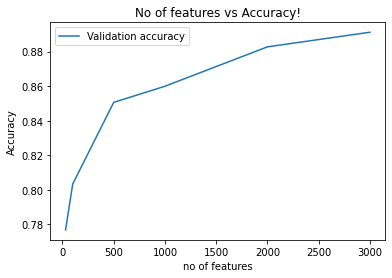

In [ ]:
import matplotlib.pyplot as plt

x_axis= [30,100,500,1000,2000,3000]
y_axis= [0.776783, 0.80336, 0.850584, 0.859920, 0.882708, 0.8911643]
plt.plot(x_axis, y_axis, label="Validation accuracy")
# naming the x axis
plt.xlabel('no of features')
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('No of features vs Accuracy!')
plt.legend()
plt.savefig('EDA_accuracy.png')
# function to show the plot
plt.show()

1.3 #EDA: univariate analysis

In [ ]:
# for col in transformed_df.columns:
#     print(col)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

plt.figure(figsize = (8, 6))
x = transformed_df["wall street"]
  
plt.hist(x, bins = 5)
plt.title("Histogram for Wall street column")
plt.xlabel("Wall street tf-idf values")
plt.ylabel("Count")
plt.savefig('hist_ws.png')
plt.show()

In [ ]:

plt.figure(figsize = (8, 6))
x = transformed_df["trump"]
  
plt.hist(x, bins = 5)
plt.title("Histogram for Trump column")
plt.xlabel("Trump tf-idf values")
plt.ylabel("Count")
plt.savefig('hist_trump.png')
plt.show()

In [ ]:
#histogram for Sepal_length column

plt.figure(figsize = (8, 6))
x = transformed_df["vladimir"]
  
plt.hist(x, bins = 5)
plt.title("Histogram for Vlamidir column")
plt.xlabel("Vladimir tf-idf values")
plt.ylabel("Count")
plt.savefig('hist_vladimir.png')
plt.show()

In [ ]:
#histogram for Sepal_length column

plt.figure(figsize = (8, 6))
x = transformed_df["ukrain"]
  
plt.hist(x, bins = 5)
plt.title("Histogram for Ukrain column")
plt.xlabel("Ukrain tf-idf values")
plt.ylabel("Count")
plt.savefig('hist_ukrain.png')
plt.show()

In [ ]:
#histogram for Sepal_length column

plt.figure(figsize = (8, 6))
x = transformed_df["twitter"]
  
plt.hist(x, bins = 5)
plt.title("Histogram for Twitter column")
plt.xlabel("Twitter tf-idf values")
plt.ylabel("Count")
plt.savefig('hist_twitter.png')
plt.show()

In [ ]:
#histogram for Sepal_length column

plt.figure(figsize = (8, 6))
x = transformed_df["vietnam"]
  
plt.hist(x, bins = 5)
plt.title("Histogram for Vietnam column")
plt.xlabel("Vietnam tf-idf values")
plt.ylabel("Count")
plt.savefig('hist_vietnam.png')
plt.show()

In [ ]:
#histogram for Sepal_length column

plt.figure(figsize = (8, 6))
x = transformed_df["spokeswoman"]
  
plt.hist(x, bins = 5)
plt.title("Histogram for Spokeswoman column")
plt.xlabel("Spokeswoman tf-idf values")
plt.ylabel("Count")
plt.savefig('hist_spokeswoman.png')
plt.show()

In [ ]:
#histogram for Sepal_length column

plt.figure(figsize = (8, 6))
x = transformed_df["washington"]
  
plt.hist(x, bins = 5)
plt.title("Histogram for Washington column")
plt.xlabel("Washington tf-idf values")
plt.ylabel("Count")
plt.savefig('hist_washington.png')
plt.show()

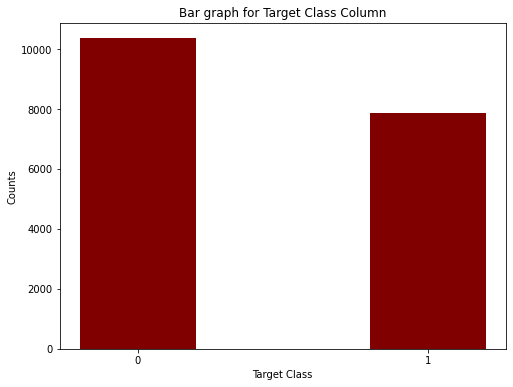

In [ ]:
#bar graph for target column 'Class'

class_counts = train_data['label'].value_counts()
class_counts = class_counts.to_dict()

plt.figure(figsize = (8,6))

plt.bar(class_counts.keys(), class_counts.values(), color='maroon', width=0.4)
plt.xlabel('Target Class')
plt.ylabel('Counts')
plt.title('Bar graph for Target Class Column')
plt.savefig('1_1c_class.png')
plt.show()

In [ ]:
class_counts

{'0': 10361, '1': 7850}